# Carregar dados
* [download](https://storage.googleapis.com/tensorflow/tf-keras-datasets/minist.npz)
* Mova o arquivo "mnist.npz" para a pasta do projeto
* execute a celula abaixo

In [1]:
import numpy as np
with np.load("mnist.npz", allow_pickle=True) as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']
print(x_train.shape, x_test.shape, y_train.shape)
print(y_train)

(60000, 28, 28) (10000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]


#### Visualização

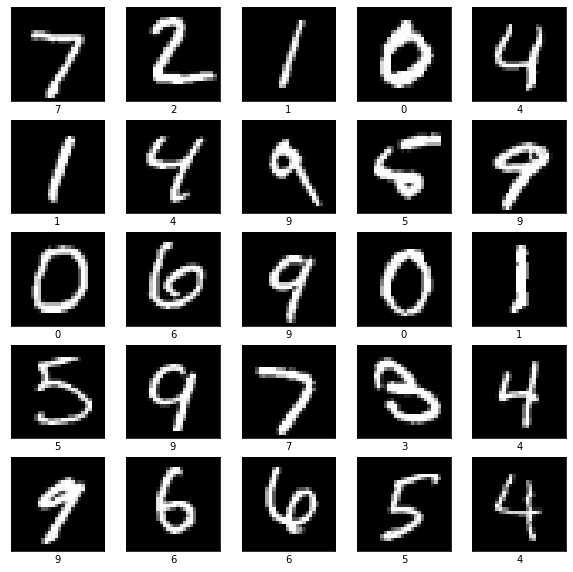

In [2]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.gray)
    plt.xlabel(str(y_test[i]))
plt.show()


# Pré-processamento

In [3]:
x_train = x_train / 255
x_test = x_test / 255

x_train = x_train[..., np.newaxis]  # np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = x_test[..., np.newaxis]

print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


# Criação do modelo

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)  # output (4, 4, 8)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

### Treinamento

In [5]:
from tensorflow.keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='./autoencoder')])

Epoch 1/10
  1/469 [..............................] - ETA: 0s - loss: 0.6901WARNING:tensorflow:From c:\repositorios\deep_learning_ets\.venv\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
469/469 [==============================] - 61s 130ms/step - loss: 0.2151 - val_loss: 0.1550
Epoch 2/10
469/469 [==============================] - 60s 127ms/step - loss: 0.1433 - val_loss: 0.1325
Epoch 3/10
469/469 [==============================] - 64s 136ms/step - loss: 0.1283 - val_loss: 0.1223
Epoch 4/10
469/469 [==============================] - 66s 140ms/step - loss: 0.1208 - val_loss: 0.1170
Epoch 5/10
469/469 [==============================] - 57s 121ms/step - loss: 0.1164 - val_loss: 0.1139
Epoch 6/10
469/469 [==============================] - 55s 118ms/step - loss: 0.1133 - val_loss: 0.1106
Epoch 7/10
469/469 [

### Visualização dos resultados

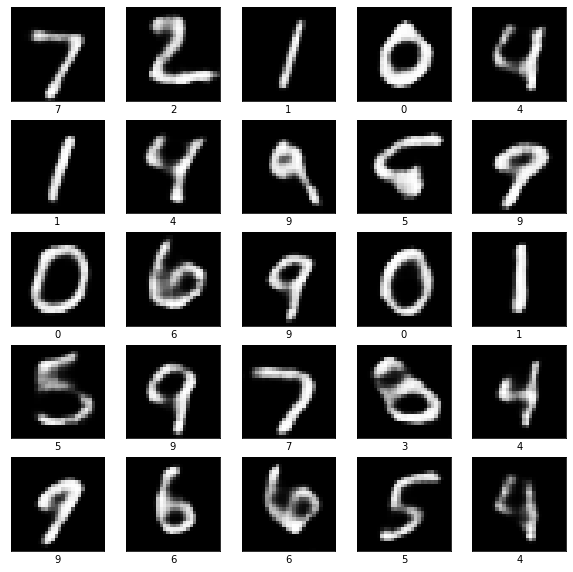

In [6]:
decoded_imgs = autoencoder.predict(x_test)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(decoded_imgs[i], cmap=plt.cm.gray)
    plt.xlabel(str(y_test[i]))
plt.show()

# Adição de ruído aos dados de treinamento

(60000, 28, 28, 1) (60000, 28, 28, 1)


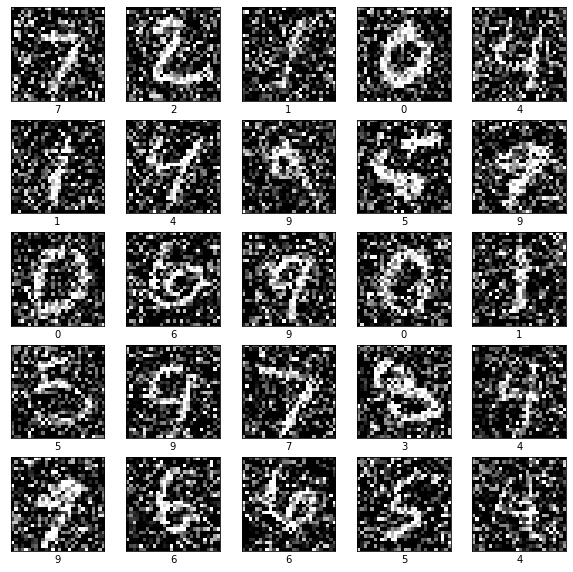

In [7]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
print(x_train_noisy.shape, x_train.shape)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_noisy[i], cmap=plt.cm.gray)
    plt.xlabel(str(y_test[i]))
plt.show()

## Criação de novo modelo para treino

In [8]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)  # output (4, 4, 8)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [9]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='./autoencoder_noisy')])

Epoch 1/10
469/469 [==============================] - 59s 126ms/step - loss: 0.2390 - val_loss: 0.1820
Epoch 2/10
469/469 [==============================] - 59s 126ms/step - loss: 0.1725 - val_loss: 0.1639
Epoch 3/10
469/469 [==============================] - 55s 116ms/step - loss: 0.1602 - val_loss: 0.1548
Epoch 4/10
469/469 [==============================] - 61s 129ms/step - loss: 0.1526 - val_loss: 0.1483
Epoch 5/10
469/469 [==============================] - 56s 120ms/step - loss: 0.1470 - val_loss: 0.1435
Epoch 6/10
469/469 [==============================] - 60s 128ms/step - loss: 0.1432 - val_loss: 0.1404
Epoch 7/10
469/469 [==============================] - 57s 122ms/step - loss: 0.1403 - val_loss: 0.1382
Epoch 8/10
469/469 [==============================] - 59s 125ms/step - loss: 0.1381 - val_loss: 0.1368
Epoch 9/10
469/469 [==============================] - 59s 125ms/step - loss: 0.1363 - val_loss: 0.1345
Epoch 10/10
469/469 [==============================] - 60s 128ms/step - l

## Visualização da remoção de ruídos pelo autoencoder

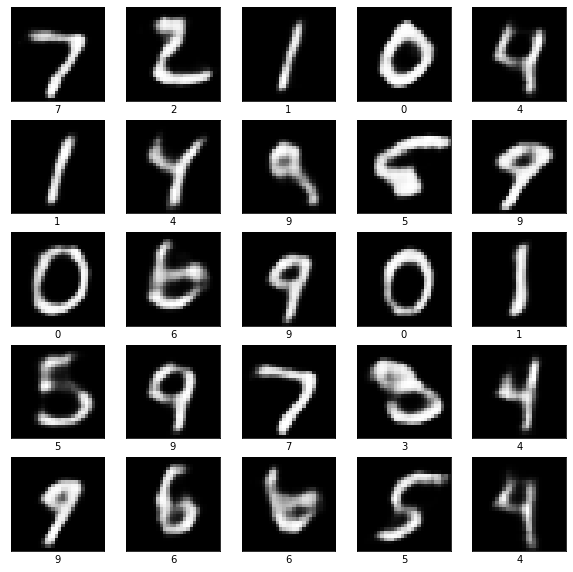

In [10]:
decoded_imgs = autoencoder.predict(x_test)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(decoded_imgs[i], cmap=plt.cm.gray)
    plt.xlabel(str(y_test[i]))
plt.show()